In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Load CPI dataset into a DataFrame
cpi_df = pd.read_csv('CPI_SeriesReport-20240506224144_c4a067_csv.csv')

# Load interest rate dataset into a DataFrame
#interest_rate_df = pd.read_csv('FEDFUNDS (interest rate 2014).csv')
interest_rate_df = pd.read_csv('FEDFUNDS (interest rate 2014).csv',
                 index_col="DATE",
                 parse_dates=True
                )
print(interest_rate_df.columns)

Index(['FEDFUNDS'], dtype='object')


C:\Users\dazzi\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
print("interest_rate_df")
print(interest_rate_df.head())
print(interest_rate_df.tail())

interest_rate_df
            FEDFUNDS
DATE                
2014-09-01      0.09
2014-10-01      0.09
2014-11-01      0.09
2014-12-01      0.12
2015-01-01      0.11
            FEDFUNDS
DATE                
2023-12-01      5.33
2024-01-01      5.33
2024-02-01      5.33
2024-03-01      5.33
2024-04-01      5.33


In [3]:
# Check column names
print(interest_rate_df.columns)

Index(['DATE', 'FEDFUNDS'], dtype='object')


In [4]:
print(interest_rate_df.dtypes)

DATE        datetime64[ns]
FEDFUNDS            object
dtype: object


<Axes: >

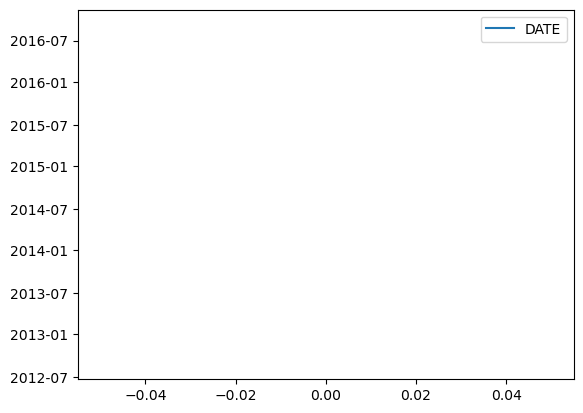

In [6]:
interest_rate_df.plot()

In [7]:
print("cpi_df")
print(cpi_df.head())
print(cpi_df.tail())

cpi_df
  Chained Consumer Price Index for All Urban Consumers (C-CPI-U): U.S. city average  \
0                                Original Data Value                                  
1                                                NaN                                  
2                                         Series Id:                                  
3                            Not Seasonally Adjusted                                  
4                                      Series Title:                                  

                                          Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                                NaN        NaN        NaN   
1                                                NaN        NaN        NaN   
2                                        SUUR0000SA0        NaN        NaN   
3                                                NaN        NaN        NaN   
4  All items in U.S. city average, all urban cons...        NaN        NaN   

 

In [ ]:
# Getting ird of the NaN values
cpi_df = cpi_df.dropna()

# Printing the DataFrame after dropping NaN values
print(cpi_df.head())
print(cpi_df.tail())


In [ ]:
print(cpi_df.columns)

In [ ]:
# Read the csv file with the header row
cpi_df = pd.read_csv('CPI_SeriesReport-20240506224144_c4a067_csv.csv', header=11)

# Check the column names of the DataFrame
print(cpi_df.columns)

cpi_df.head()

In [ ]:
#Cleaning up the data frame by melting years and months together. Which will allow us have less rows when we send it to prophet.
df_long = pd.melt(cpi_df, id_vars='Year',value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],var_name='Month', value_name='Value')

In [ ]:
df_long

In [ ]:
# Concatenate 'Year' and 'Month' columns. Also need to turn them to a string series.
df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'], format='%Y-%b')

# Dropping the 'Year' and 'Month' columns
df_long.drop(columns=['Year', 'Month'], inplace=True)


In [ ]:
df_long

In [ ]:
# Sorting the values and droping the NaN values again.
df_long = df_long.sort_values('Date').dropna()
df_long

In [ ]:
#Turing the index so that it uses date. Again so we can use it with prophet
df_long = df_long.set_index('Date')
df_long

In [ ]:
df_long.plot()